# import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


upload file yang akan dianalisa

In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [0]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# The shape of the data

In [5]:
df.shape

(1338, 7)

# The data type of each attribute

In [0]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Checking the presence of missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


# Distribution of 'bmi', 'age' and 'charges' columns

Distribution of charges

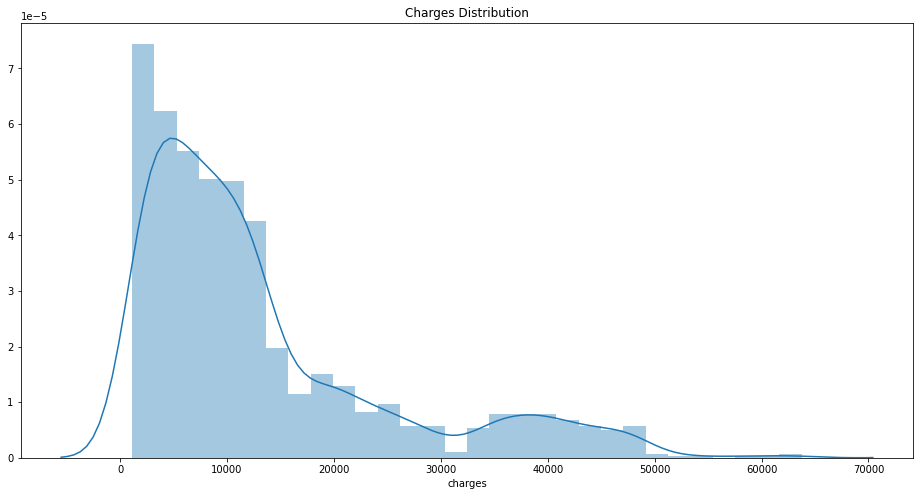

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(df['charges']).set(title = 'Charges Distribution')

grafik di atas menunjukkan right skewness

Distribution of age

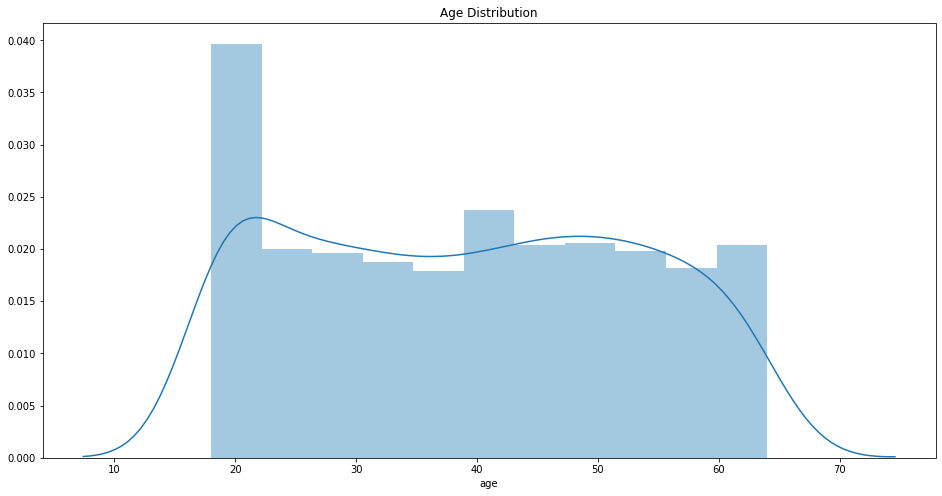

In [10]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(df['age']).set(title = 'Age Distribution')

usian menunjukkan distribusi uniform

Distribution of BMI

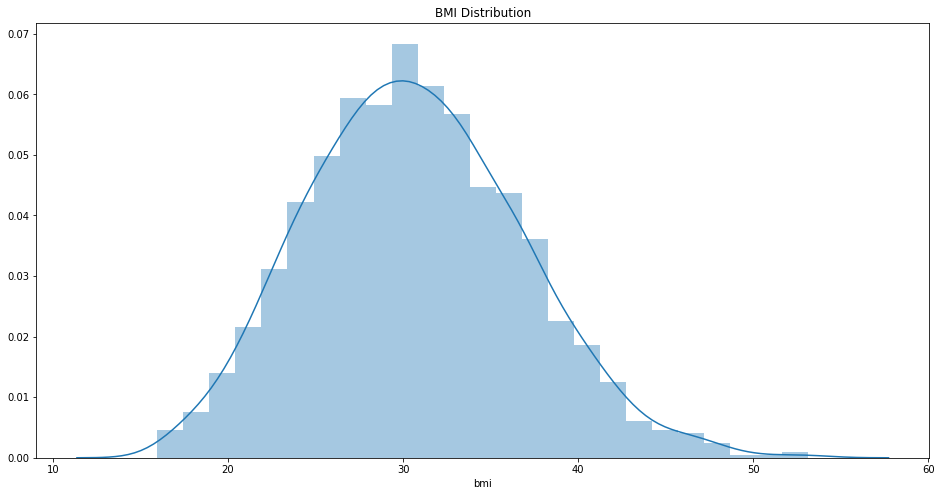

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(df['bmi']).set(title = 'BMI Distribution')

bmi menunjukkan distribusi normal

# Skewness Age

In [13]:
ageSkewValue = df["age"].skew()
print("Skew Value dari Age adalah",round(ageSkewValue,2))

Skew Value dari Age adalah 0.06


# Skewness BMI

In [12]:
bmiSkewValue = df["bmi"].skew()
print("Skew Value dari BMI adalah",round(bmiSkewValue,2))

Skew Value dari BMI adalah 0.28


# Skewness Charge

In [14]:
chargeSkewValue = df["charges"].skew()
print("Skew Value dari charge adalah",round(chargeSkewValue,2))

Skew Value dari charge adalah 1.52


# presence of outliers in BMI

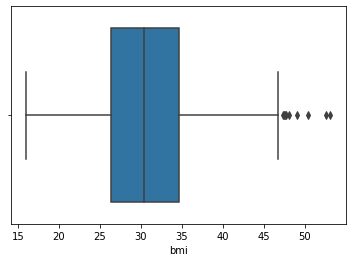

In [15]:
sns.boxplot(x=df['bmi'])


# presence of outliers in age

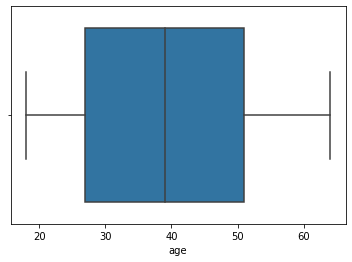

In [16]:
sns.boxplot(x=df['age'])


# presence of outliers in chages

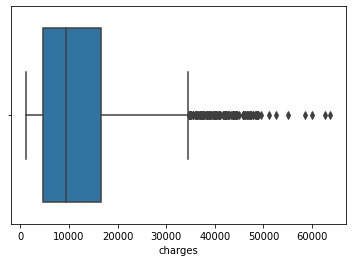

In [17]:
sns.boxplot(x=df['charges'])


# Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [0]:
smoker = np.array(df[df.smoker == 'yes']['charges'].reset_index().drop(columns={'index'}))
not_smoker = np.array(df[df.smoker == 'no']['charges'].reset_index().drop(columns={'index'}))

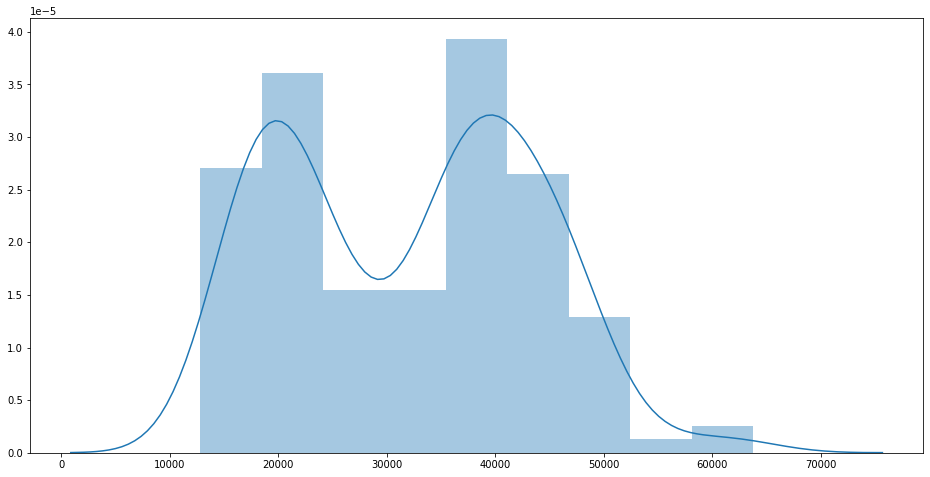

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.distplot(smoker)

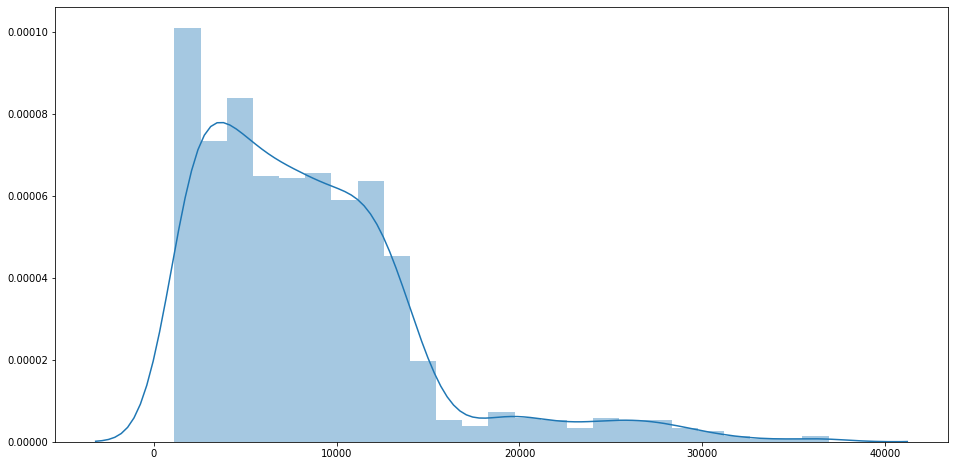

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)
ax = sns.distplot(not_smoker)

In [0]:
from statsmodels.stats.weightstats import ztest

In [22]:
t, p_val = ztest(smoker, not_smoker)

if p_val < 0.05:
  print('p-val is {}. It smaller than alpha, so we reject H0, and accept that Smoker Charges is different than non Smoker'.format(p_val[0]))
else:
  print('p-val is {}. It bigger than alpha, so we accept H0'.format(p_val[0]))

p-val is 0.0. It smaller than alpha, so we reject H0, and accept that Smoker Charges is different than non Smoker
